In [1]:
#### python
import os
import sys
import importlib
# columnar analysis
from coffea import processor
from coffea.nanoevents import NanoAODSchema
import awkward as ak
from dask.distributed import Client, performance_report
# local
sidm_path = str(os.getcwd()).split("/sidm")[0]
if sidm_path not in sys.path: sys.path.insert(1, sidm_path)
from sidm.tools import utilities, sidm_processor, scaleout, llpnanoaodschema
# always reload local modules to pick up changes during development
importlib.reload(utilities)
importlib.reload(sidm_processor)
importlib.reload(scaleout)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline
import coffea.util
import mplhep as hep

In [2]:
client = scaleout.make_dask_client("tls://localhost:8786")
client

<Client: 'tls://192.168.161.131:8786' processes=50 threads=50, memory=144.35 GiB>

In [3]:
samples = [
    '2Mu2E_500GeV_0p25GeV_4p0mm',
     '2Mu2E_500GeV_1p2GeV_19p0mm',
     '2Mu2E_500GeV_5p0GeV_80p0mm',
  
]
fileset = utilities.make_fileset(samples, 
                                 "llpNanoAOD_v2", 
                                 location_cfg="signal_2mu2e_v10.yaml",
                                  # max_files =10
                                  # max_files =1
                                )

In [4]:
channels = [
    "baseNoLj_A_ee_highPtA_lowLxyA",
    "baseNoLj_A_ee_matched_lj_highPT_lowLxyA",

    "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso",
    "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso_disp", 

 
    
           
           ]
p = sidm_processor.SidmProcessor(
    channels,
    ["lj_reco_effi_base",],
    unweighted_hist=False,
   
)
runner = processor.Runner(
    # executor=processor.IterativeExecutor(),
    executor=processor.DaskExecutor(client=client),
    # schema=NanoAODSchema,
    schema = llpnanoaodschema.LLPNanoAODSchema,
    #maxchunks=1,
    skipbadfiles=True,
)
# test if processor is serializable
output = runner.run(fileset, treename="Events", processor_instance=p)




Output()

Output()

2Mu2E_500GeV_5p0GeV_80p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_0p25GeV_4p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb
2Mu2E_500GeV_1p2GeV_19p0mm is simulation. Scaling histograms or cutflows according to lumi*xs.
Signal not in xs cfg, assuming 1fb


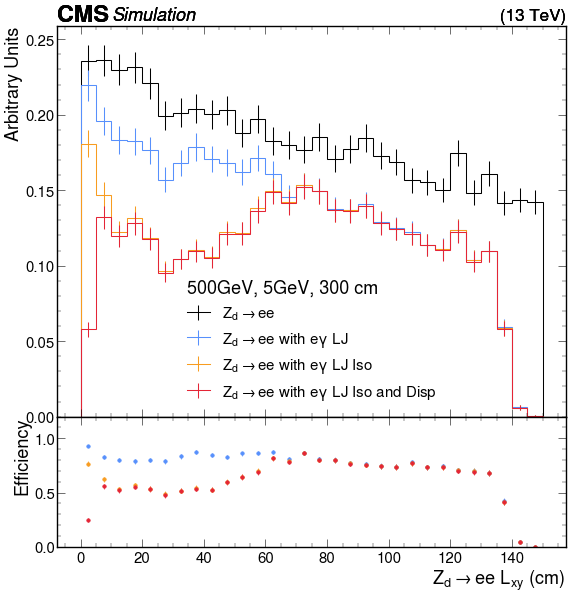

In [10]:
hists = output["out"]["2Mu2E_500GeV_5p0GeV_80p0mm"]["hists"]

ch1 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch3 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso_disp"
histogram = "genAs_toE_lxy"

num_list = [
          hists[histogram][ch2, :],
          hists[histogram][ch3, :],
         hists[histogram][ch4, :],
]
legend = [
r"$Z_d \rightarrow ee $",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ ",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ Iso",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ Iso and Disp"
]
den = hists[histogram][ch1,:]
utilities.plot_ratio (num_list,den,legend =legend, text = "500GeV, 5GeV, 300 cm", ylabel = "Arbitrary Units")        
    
    # plt.savefig(save_path)


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()


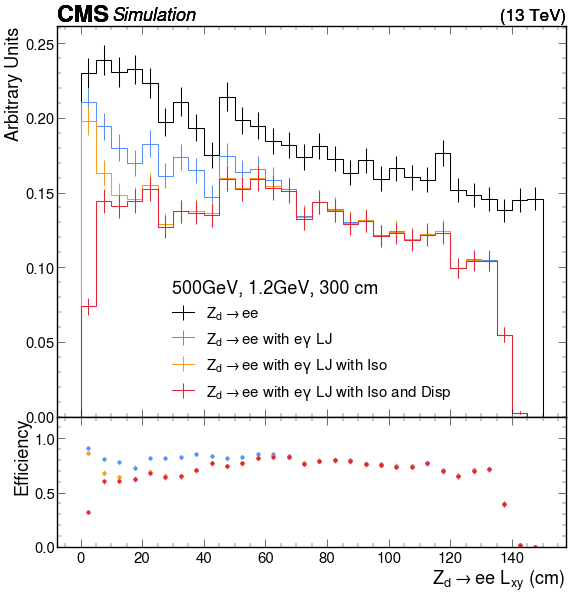

In [12]:
hists = output["out"]["2Mu2E_500GeV_1p2GeV_19p0mm"]["hists"]

ch1 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch3 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso_disp"
histogram = "genAs_toE_lxy"

num_list = [
          hists[histogram][ch2, :],
          hists[histogram][ch3, :],
         hists[histogram][ch4, :],
]
legend = [
r"$Z_d \rightarrow ee $",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ ",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ with Iso",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ with Iso and Disp"
]
den = hists[histogram][ch1,:]
utilities.plot_ratio (num_list,den,legend =legend, text = "500GeV, 1.2GeV, 300 cm", ylabel = "Arbitrary Units")    
    # save_path = os.path.join(folder_name, filename)         
    
    # plt.savefig(save_path)


/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()
/home/cms-jovyan/SIDM/sidm/tools/utilities.py:163: RuntimeWarning: invalid value encountered in divide
  num_counts = num_vals**2 / num_hist.variances()


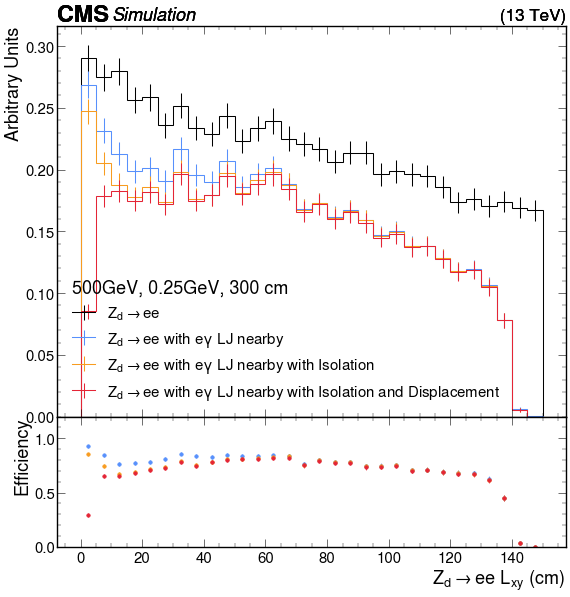

In [8]:
hists = output["out"]["2Mu2E_500GeV_0p25GeV_4p0mm"]["hists"]

ch1 = "baseNoLj_A_ee_highPtA_lowLxyA"
ch2 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA"
ch3 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso"
ch4 = "baseNoLj_A_ee_matched_lj_highPT_lowLxyA_iso_disp"
histogram = "genAs_toE_lxy"

num_list = [
          hists[histogram][ch2, :],
          hists[histogram][ch3, :],
         hists[histogram][ch4, :],
]
legend = [
r"$Z_d \rightarrow ee $",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ nearby",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ nearby with Isolation",
r"$Z_d \rightarrow ee$ with $e \gamma$ LJ nearby with Isolation and Displacement"
]
den = hists[histogram][ch1,:]
utilities.plot_ratio (num_list,den,legend =legend, text = "500GeV, 0.25GeV, 300 cm", ylabel = "Arbitrary Units")    
    # save_path = os.path.join(folder_name, filename)         
    
    # plt.savefig(save_path)
